In [72]:
import pandas as pd
#import matplotlib
import matplotlib
matplotlib.use('Agg')  # Or any other X11 back-end
import matplotlib.pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parse_results import *
from utils.utils import *
RES_DIR = "./new_results_noval"
RES_DIR_FIXED = "./fixed_results"
#RES_DIR = "./prev_new_results"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
df = get_summary_df(RES_DIR)
df = df[df["summary_type"] == "mean"]
#df = df[df["samples_type"] == "test"]
df = df[df["heuristic_features"] == 1]
#df = df[df["hidden_layer_size"] <= 256]
#df = df[df["max_discrete_featurizing_buckets"] > 1]
df = df[df["max_discrete_featurizing_buckets"] < 100]

template_df = df[df["template"] != "all"]
df = df[df["template"] == "all"]

print("only plotting mscn results")
df = df[df["nn_type"] == "mscn"]

#jcosts_mscn = df_mscn[df_mscn["loss_type"] == "jcost"]
#qerrs_mscn = df_mscn[df_mscn["loss_type"] == "qerr"]
#print(len(df))

get summary df!
only plotting mscn results


In [74]:
true_df = get_summary_df(RES_DIR_FIXED)
true_df = true_df[true_df["summary_type"] == "mean"]
true_df = true_df[true_df["template"] == "all"]
true_df = true_df[true_df["loss_type"] == "jcost"]
train_jcost = true_df[true_df["samples_type"] == "train"]["loss"].values[0]
test_jcost = true_df[true_df["samples_type"] == "test"]["loss"].values[0]


get summary df!


30


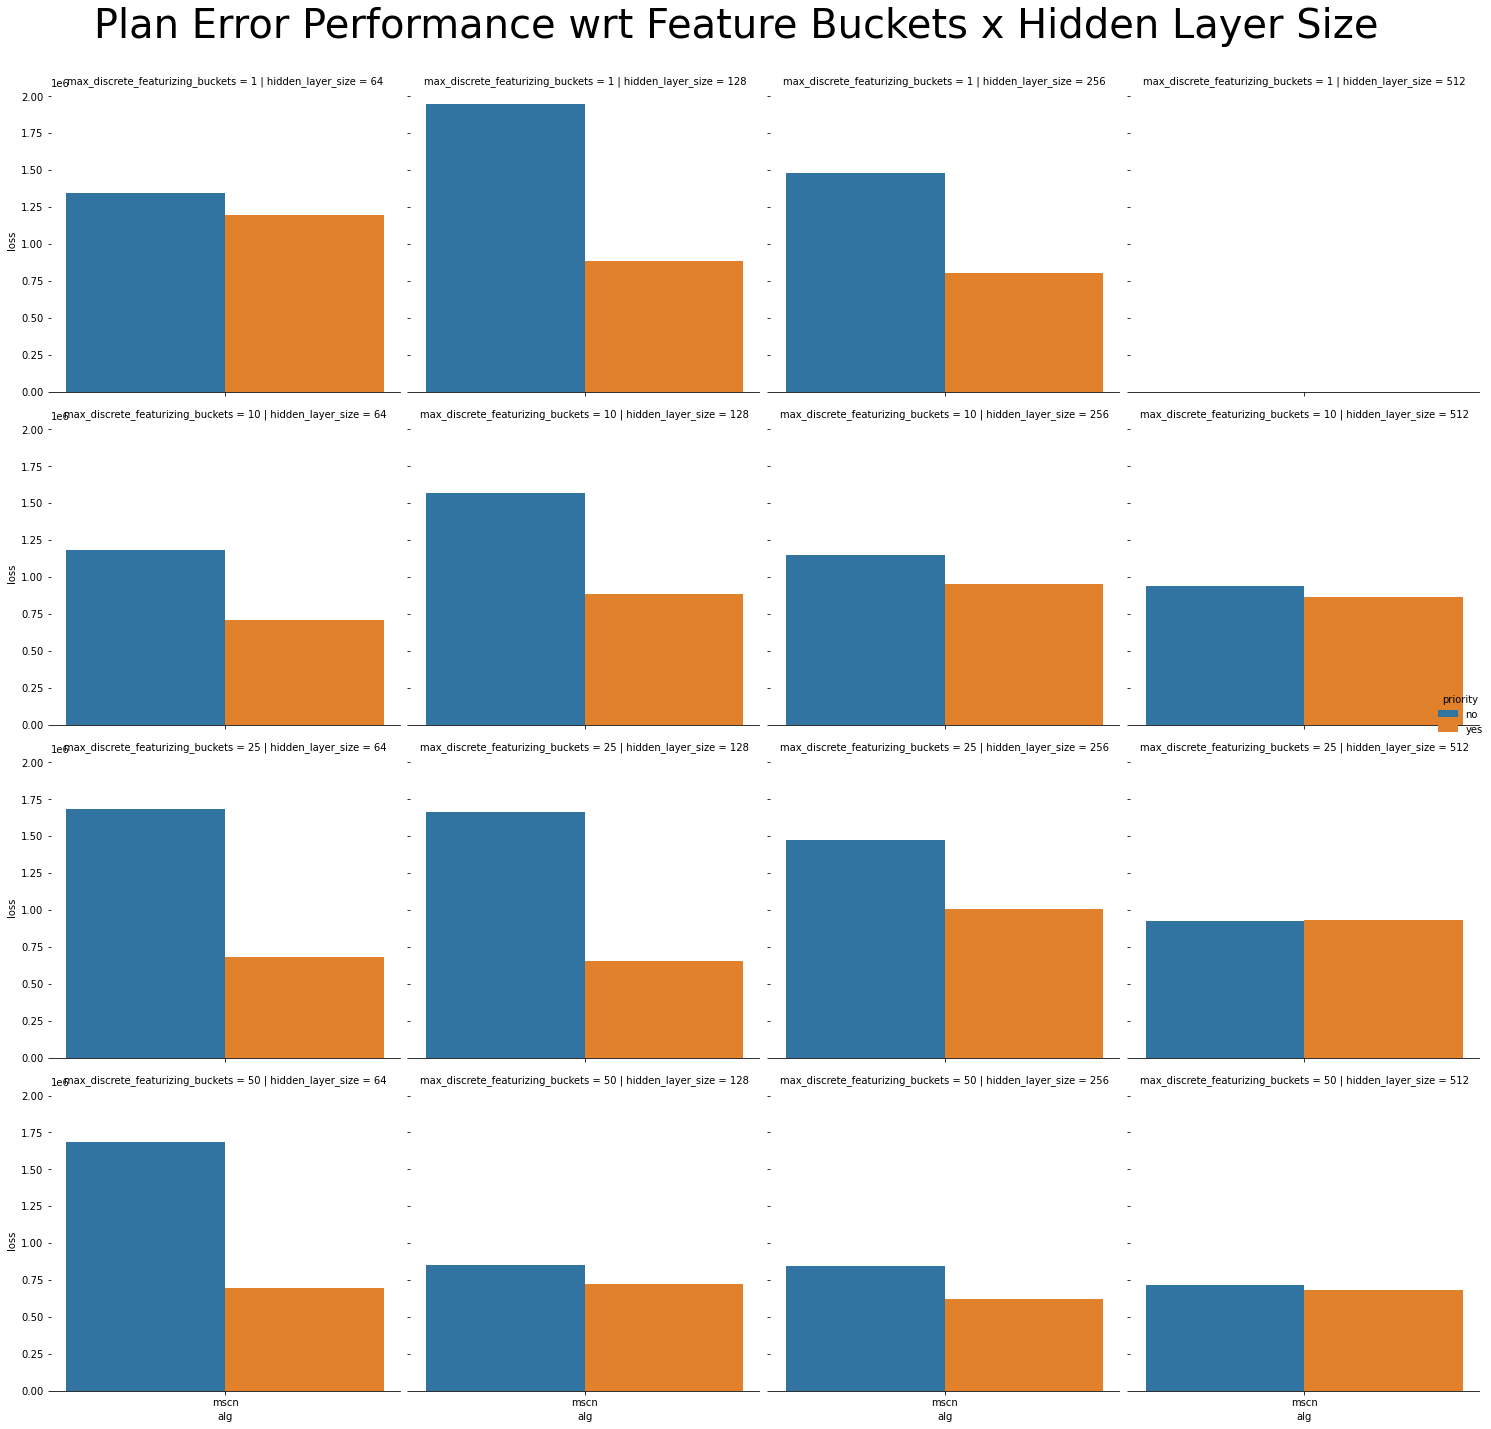

In [75]:
cur_df = df[df["samples_type"] == "test"]
cur_df = cur_df[cur_df["loss_type"] == "jcost"]
cur_df["loss"] = cur_df["loss"].apply(lambda x : x - test_jcost)

print(len(cur_df))
fg = sns.catplot(x="alg", y="loss",
            data=cur_df, row="max_discrete_featurizing_buckets",
            col = "hidden_layer_size", hue="priority", kind="bar",
            hue_order=["no", "yes"], ci=75)
#fg.add_legend()
fg.fig.suptitle("Plan Error Performance wrt Feature Buckets x Hidden Layer Size ",
            x=0.5, y=.99, horizontalalignment='center',
            verticalalignment='top', fontsize = 40)
fg.despine(left=True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

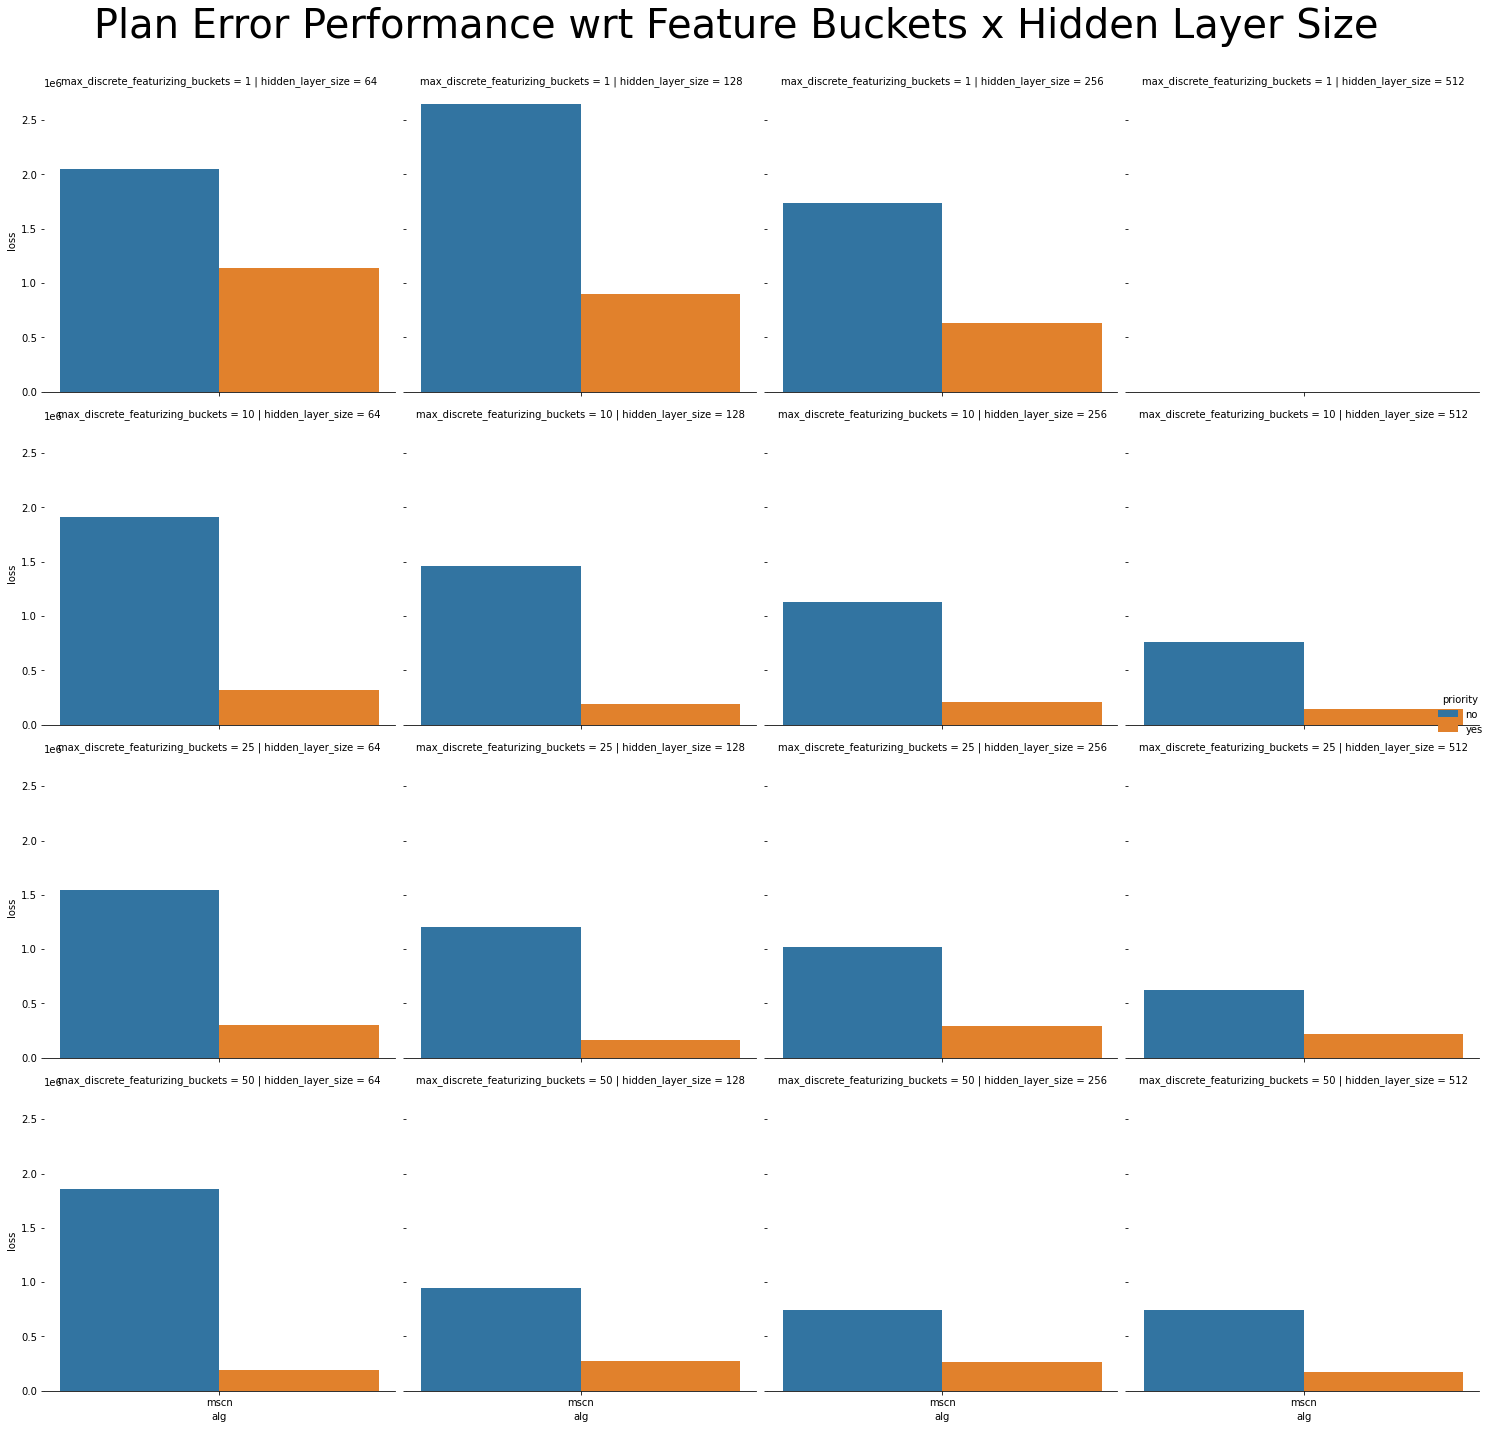

In [76]:
cur_df = df[df["samples_type"] == "train"]
cur_df = cur_df[cur_df["loss_type"] == "jcost"]
cur_df["loss"] = cur_df["loss"].apply(lambda x : x - train_jcost)

fg = sns.catplot(x="alg", y="loss",
            data=cur_df, row="max_discrete_featurizing_buckets",
            col = "hidden_layer_size", hue="priority", kind="bar",
            hue_order=["no", "yes"], ci=75)
#fg.add_legend()
fg.fig.suptitle("Plan Error Performance wrt Feature Buckets x Hidden Layer Size ",
            x=0.5, y=.99, horizontalalignment='center',
            verticalalignment='top', fontsize = 40)
fg.despine(left=True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

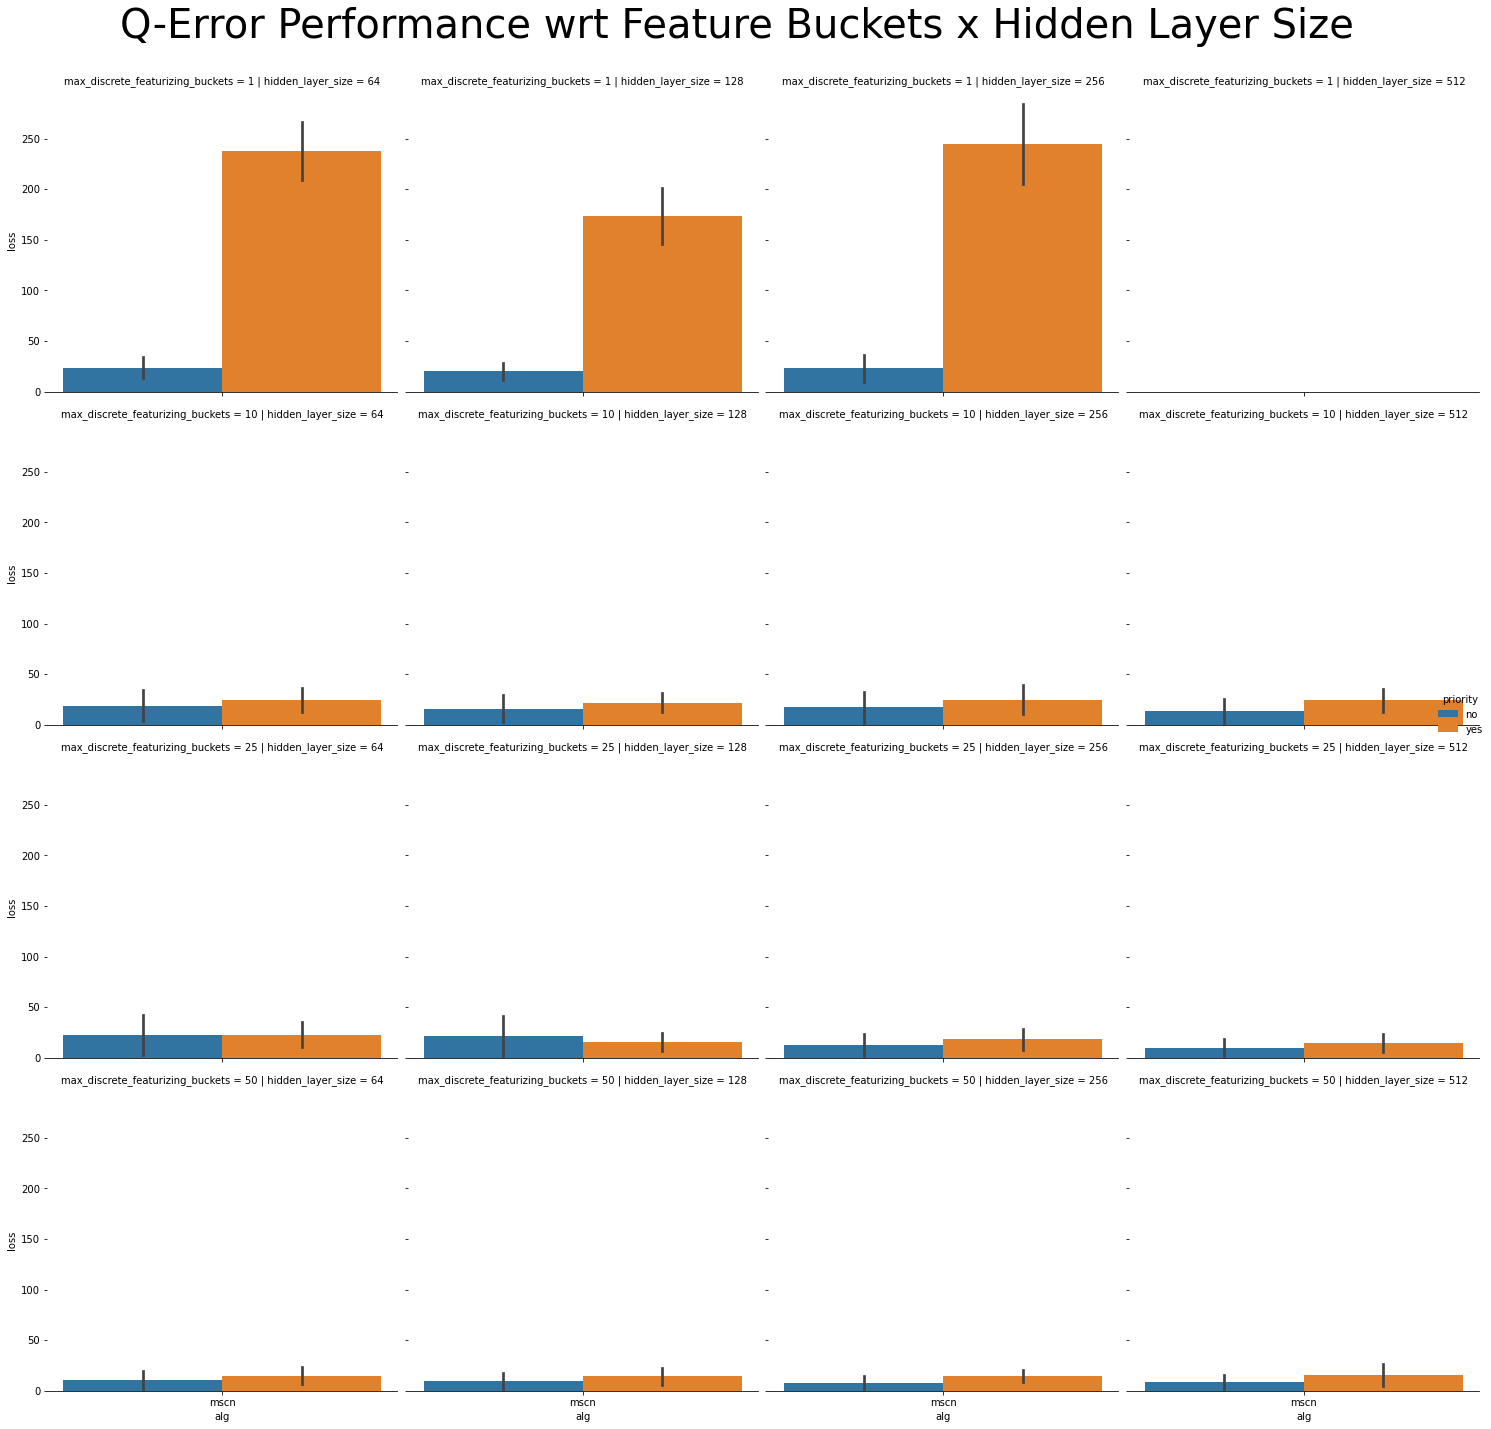

In [78]:
cur_df = df[df["loss_type"] == "qerr"]
fg = sns.catplot(x="alg", y="loss",
            data=cur_df, row="max_discrete_featurizing_buckets",
            col = "hidden_layer_size", hue="priority", kind="bar",
            hue_order=["no", "yes"], ci=75)
#fg.add_legend()
fg.fig.suptitle("Q-Error Performance wrt Feature Buckets x Hidden Layer Size ",
            x=0.5, y=.99, horizontalalignment='center',
            verticalalignment='top', fontsize = 40)
fg.despine(left=True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()